# Master Data Science, Lyon 1
# TP1 PGM 2023 (durée 3h)

Alex Aussem (aaussem@univ-lyon1.fr)

***
In this tutrial, you will learn how to create and train PGM models with **aGrUM/PyAGrUM**, a GRaphical Universal Modeler available at https://agrum.gitlab.io, developed at LIP6 - DESIR department - Decision Theory team, Université Sorbonne, by Pierre-Henri Wuillemin, Christophe Gonzales and many contributors (PhD students).

The main concepts (conditional independencies, parameter learning, inference, structure learning etc.) seen in the PGM course (Master Data Science, Lyon 1) will be illustrated as well as the excerices.

See also: https://gitlab.com/agrumery/aGrUM,

Installation: conda install -c conda-forge pyagrum

**aGrUM** is a C++ library for graphical models. It is designed for easily building applications using graphical models such as Bayesian networks, influence diagrams, decision trees, GAI networks or Markov decision processes.

**PyAGrUM** is a Python wrapper for the C++ aGrUM library. It provides a high-level interface to the part of aGrUM allowing to create, handle and make computations into Bayesian Networks.

In this notebook, you will learn how to

- design a BN model with the basic building blocks provided by Agrum/pyAgrum,
- learn its structure and the parameters from data
- perform exact or approximate inference with evidence,
- play with several benchmlark models like **ASIA** and **ALARM**.

Template BNs in various formats are available at:
https://github.com/eBay/bayesian-belief-networks/tree/master/bayesian/examples/bif

In [2]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import os

In [3]:
pip install pyAgrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 9.4 MB/s eta 0:00:00


In [4]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [5]:
gnb.configuration()

Library,Version
OS,posix [linux]
Python,"3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]"
IPython,7.34.0
Matplotlib,3.7.1
Numpy,1.23.5
pyDot,1.4.2
pyAgrum,1.11.0


## Create the network topology


In [ ]:
bn=gum.BayesNet('WaterSprinkler')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0}


In [ ]:
c=bn.add(gum.LabelizedVariable('c','cloudy ?',2))
print(c)

0


In [ ]:
s, r, w = [ bn.add(name, 2) for name in "srw" ] #bn.add(name, 2) === bn.add(gum.LabelizedVariable(name, name, 2))
print (s,r,w)
print (bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 8}


In [ ]:
bn.addArc(c,s)

In [ ]:
for link in [(c,r),(s,w),(r,w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}


In [ ]:
#import pyAgrum.lib.notebook as gnb
bn

(gum::BayesNet<double>@0x7fb87b015600) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 18}

In [ ]:
bn.cpt(c).fillWith([0.5,0.5])

(gum::Potential<double>@0x7fb87ac8d390) <c:0> :: 0.5 /<c:1> :: 0.5

In [ ]:
bn.cpt("c").fillWith([0.4,0.6])

(gum::Potential<double>@0x7fb87ac8d390) <c:0> :: 0.4 /<c:1> :: 0.6

In [ ]:
bn.cpt(s).var_names

['c', 's']

In [ ]:
bn.cpt(s)[:]=[ [0.5,0.5],[0.9,0.1]]

In [ ]:
print(bn.cpt(s)[1])

[0.9 0.1]


In [ ]:
bn.cpt(w)[0,0,:] = [1, 0] # r=0,s=0
bn.cpt(w)[0,1,:] = [0.1, 0.9] # r=0,s=1
bn.cpt(w)[1,0,:] = [0.1, 0.9] # r=1,s=0
bn.cpt(w)[1,1,:] = [0.01, 0.99] # r=1,s=1
bn.cpt(w)

(gum::Potential<double>@0x7fb87ae82e10) <w:0|s:0|r:0> :: 1 /<w:1|s:0|r:0> :: 0 /<w:0|s:1|r:0> :: 0.1 /<w:1|s:1|r:0> :: 0.9 /<w:0|s:0|r:1> :: 0.1 /<w:1|s:0|r:1> :: 0.9 /<w:0|s:1|r:1> :: 0.01 /<w:1|s:1|r:1> :: 0.99

In [ ]:
bn.cpt(r)[{'c':0}]=[0.8,0.2]
bn.cpt(r)[{'c':1}]=[0.2,0.8]

## Inference with evidence

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()

In [ ]:
print (ie.posterior(w))

<w:0> :: 0.33328 /<w:1> :: 0.66672


In [ ]:
ie.posterior(w)

(gum::Potential<double>@0x7fb85ac091b0) <w:0> :: 0.33328 /<w:1> :: 0.66672

In [ ]:
ie.setEvidence({'s':0, 'c': 0})
ie.makeInference()
ie.posterior(w)

(gum::Potential<double>@0x7fb81adb93c0) <w:0> :: 0.82 /<w:1> :: 0.18

In [ ]:
ie.setEvidence({'s': [0.5, 1], 'c': [1, 0]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x7fb85acd25e0) <w:0> :: 0.328 /<w:1> :: 0.672

In [ ]:
ie.setEvidence({'s': [0.5, 1]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x7fb87afd88d0) <w:0> :: 0.278857 /<w:1> :: 0.721143

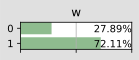

In [ ]:
%matplotlib inline
gnb.showProba(ie.posterior(w))

In [ ]:
ie.setEvidence({'s': [1, 0], 'c': [0, 1]})
ie.makeInference()
ie.posterior(w) # using gnb's feature

(gum::Potential<double>@0x7fb81add1460) <w:0> :: 0.28 /<w:1> :: 0.72

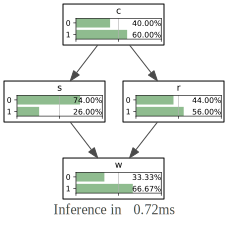

In [ ]:
gnb.showInference(bn,evs={})

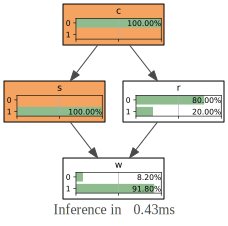

In [ ]:
gnb.showInference(bn,evs={'s':1,'c':0})

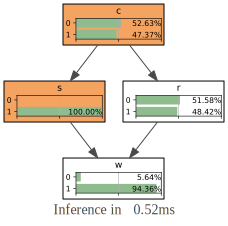

In [ ]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]})

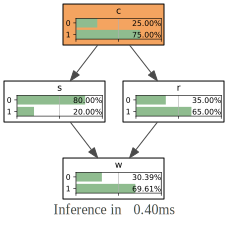

In [ ]:
gnb.showInference(bn,evs={'c':[0.5,1]})
# 0.4 x 0.5 = 0.2 , 0.6 x 1 = 0.6 , 0.2 / (0.2 + 0.6) = 25.0%

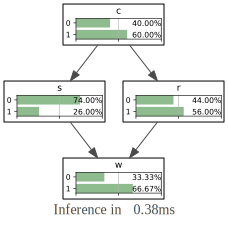

In [ ]:
gnb.showInference(bn)

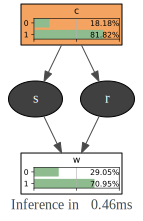

In [ ]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})

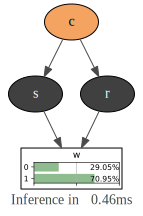

In [ ]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'w'})

# Joint probablity distribution

In [ ]:
pCRSW=bn.cpt("c")*bn.cpt("r")*bn.cpt("s")*bn.cpt("w")
pCRSW

(gum::Potential<double>@0x7fb81adf5420) <s:0|r:0|w:0|c:0> :: 0.16 /<s:1|r:0|w:0|c:0> :: 0.016 /<s:0|r:1|w:0|c:0> :: 0.004 /<s:1|r:1|w:0|c:0> :: 0.0004 /<s:0|r:0|w:1|c:0> :: 0 /<s:1|r:0|w:1|c:0> :: 0.144 /<s:0|r:1|w:1|c:0> :: 0.036 /<s:1|r:1|w:1|c:0> :: 0.0396 /<s:0|r:0|w:0|c:1> :: 0.108 /<s:1|r:0|w:0|c:1> :: 0.0012 /<s:0|r:1|w:0|c:1> :: 0.0432 /<s:1|r:1|w:0|c:1> :: 0.00048 /<s:0|r:0|w:1|c:1> :: 0 /<s:1|r:0|w:1|c:1> :: 0.0108 /<s:0|r:1|w:1|c:1> :: 0.3888 /<s:1|r:1|w:1|c:1> :: 0.04752

In [ ]:
pWgivenC=(pCRSW.margSumOut(["r","s"])/pCRSW.margSumOut(["r","s","w"]))
pWgivenC

(gum::Potential<double>@0x7fb84ac0c560) <c:0|w:0> :: 0.451 /<c:1|w:0> :: 0.2548 /<c:0|w:1> :: 0.549 /<c:1|w:1> :: 0.7452

In [ ]:
pRS=pCRSW.margSumOut(["c","w"])
pRS

(gum::Potential<double>@0x7fb84ac0c4a0) <s:0|r:0> :: 0.268 /<s:1|r:0> :: 0.172 /<s:0|r:1> :: 0.472 /<s:1|r:1> :: 0.088

In [ ]:
pRS.margSumOut(["r"])

(gum::Potential<double>@0x7fb80ac0b060) <s:0> :: 0.74 /<s:1> :: 0.26

## Loading a benchmark BN model

In [ ]:
!pwd
bn = gum.loadBN(os.path.join("templates","alarm.bif"))
#bn = gum.loadBN("alarm.bif")

/Users/aaussem/Documents/Python/TP/TP_PGM_2020


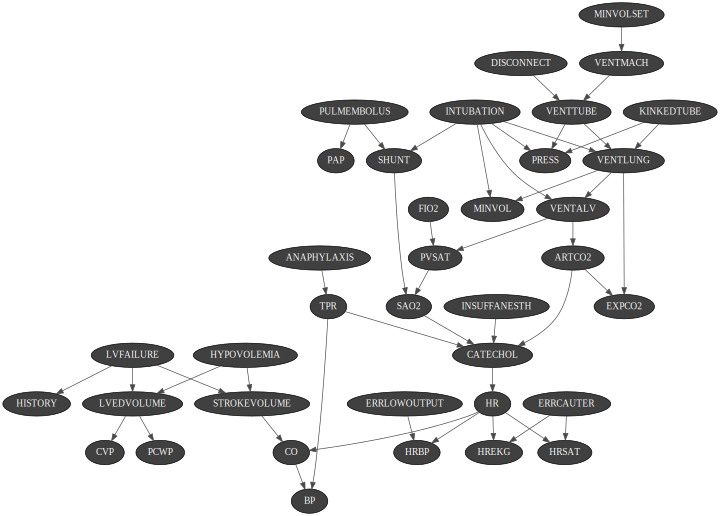

In [ ]:
gnb.showBN(bn,size='10')

# Visualisation and inspection


In [ ]:
print(bn.variableFromName('SHUNT'))

SHUNT<NORMAL,HIGH>


In [ ]:
print(bn.cpt(bn.idFromName('SHUNT')))

<SHUNT:NORMAL|INTUBATION:NORMAL|PULMEMBOLUS:TRUE> :: 0.1 /<SHUNT:HIGH|INTUBATION:NORMAL|PULMEMBOLUS:TRUE> :: 0.9 /<SHUNT:NORMAL|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:TRUE> :: 0.1 /<SHUNT:HIGH|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:TRUE> :: 0.9 /<SHUNT:NORMAL|INTUBATION:ONESIDED|PULMEMBOLUS:TRUE> :: 0.01 /<SHUNT:HIGH|INTUBATION:ONESIDED|PULMEMBOLUS:TRUE> :: 0.99 /<SHUNT:NORMAL|INTUBATION:NORMAL|PULMEMBOLUS:FALSE> :: 0.95 /<SHUNT:HIGH|INTUBATION:NORMAL|PULMEMBOLUS:FALSE> :: 0.05 /<SHUNT:NORMAL|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:FALSE> :: 0.95 /<SHUNT:HIGH|INTUBATION:ESOPHAGEAL|PULMEMBOLUS:FALSE> :: 0.05 /<SHUNT:NORMAL|INTUBATION:ONESIDED|PULMEMBOLUS:FALSE> :: 0.05 /<SHUNT:HIGH|INTUBATION:ONESIDED|PULMEMBOLUS:FALSE> :: 0.95


In [ ]:
gnb.showPotential(bn.cpt(bn.idFromName('SHUNT')),digits=3)

# Inference

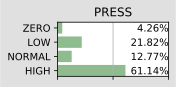

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showPosterior(bn,{'SHUNT':'HIGH'},'PRESS')

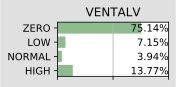

In [ ]:
gnb.showPosterior(bn,{'MINVOLSET':'NORMAL'},'VENTALV')

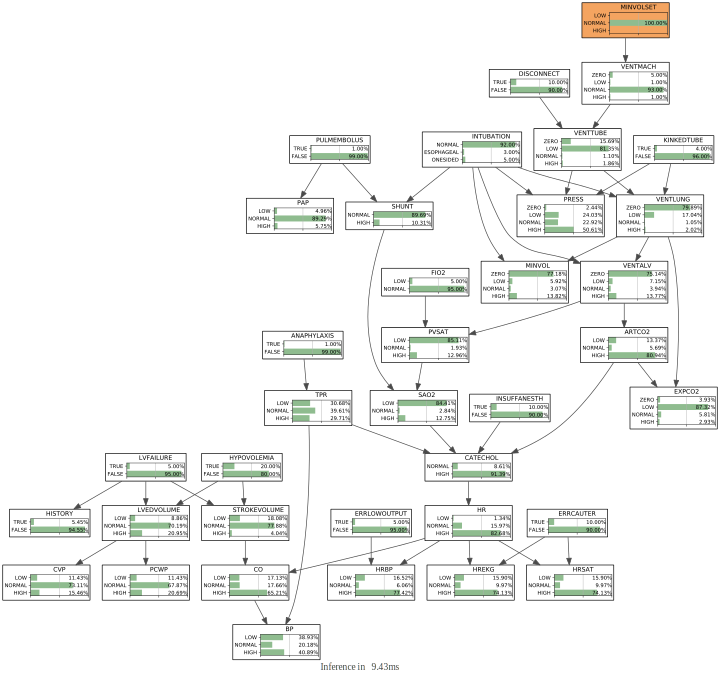

In [ ]:
gnb.showInference(bn,size="10",evs={'MINVOLSET':'NORMAL'})

In [ ]:
#ie=gum.LazyPropagation(bn)
ie.evidenceImpact('PRESS',['SHUNT','VENTALV'])

(gum::Potential<double>@0x7fb7dadda7e0) <PRESS:ZERO|VENTALV:ZERO|SHUNT:NORMAL> :: 0.0221183 /<PRESS:LOW|VENTALV:ZERO|SHUNT:NORMAL> :: 0.263196 /<PRESS:NORMAL|VENTALV:ZERO|SHUNT:NORMAL> :: 0.269519 /<PRESS:HIGH|VENTALV:ZERO|SHUNT:NORMAL> :: 0.445166 /<PRESS:ZERO|VENTALV:LOW|SHUNT:NORMAL> :: 0.125371 /<PRESS:LOW|VENTALV:LOW|SHUNT:NORMAL> :: 0.10827 /<PRESS:NORMAL|VENTALV:LOW|SHUNT:NORMAL> :: 0.110427 /<PRESS:HIGH|VENTALV:LOW|SHUNT:NORMAL> :: 0.655931 /<PRESS:ZERO|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.0286313 /<PRESS:LOW|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.267487 /<PRESS:NORMAL|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.211507 /<PRESS:HIGH|VENTALV:NORMAL|SHUNT:NORMAL> :: 0.492375 /<PRESS:ZERO|VENTALV:HIGH|SHUNT:NORMAL> :: 0.011516 /<PRESS:LOW|VENTALV:HIGH|SHUNT:NORMAL> :: 0.276194 /<PRESS:NORMAL|VENTALV:HIGH|SHUNT:NORMAL> :: 0.0704238 /<PRESS:HIGH|VENTALV:HIGH|SHUNT:NORMAL> :: 0.641867 /<PRESS:ZERO|VENTALV:ZERO|SHUNT:HIGH> :: 0.0230181 /<PRESS:LOW|VENTALV:ZERO|SHUNT:HIGH> :: 0.260988 /<PRESS:NORMAL|VENTALV:ZERO|SHUNT:HIGH> :: 0.26437 /<PRESS:HIGH|VENTALV:ZERO|SHUNT:HIGH> :: 0.451623 /<PRESS:ZERO|VENTALV:LOW|SHUNT:HIGH> :: 0.0242729 /<PRESS:LOW|VENTALV:LOW|SHUNT:HIGH> :: 0.027722 /<PRESS:NORMAL|VENTALV:LOW|SHUNT:HIGH> :: 0.0211337 /<PRESS:HIGH|VENTALV:LOW|SHUNT:HIGH> :: 0.926871 /<PRESS:ZERO|VENTALV:NORMAL|SHUNT:HIGH> :: 0.118778 /<PRESS:LOW|VENTALV:NORMAL|SHUNT:HIGH> :: 0.353364 /<PRESS:NORMAL|VENTALV:NORMAL|SHUNT:HIGH> :: 0.0360745 /<PRESS:HIGH|VENTALV:NORMAL|SHUNT:HIGH> :: 0.491783 /<PRESS:ZERO|VENTALV:HIGH|SHUNT:HIGH> :: 0.0136186 /<PRESS:LOW|VENTALV:HIGH|SHUNT:HIGH> :: 0.271903 /<PRESS:NORMAL|VENTALV:HIGH|SHUNT:HIGH> :: 0.068295 /<PRESS:HIGH|VENTALV:HIGH|SHUNT:HIGH> :: 0.646183

#  Entropy of all nodes

In [ ]:
gnb.showInformation(bn,{},size="20")

# Impact of evidence

In [ ]:
gnb.showInformation(bn,{"CO":0},size="9")

# Exploring the junction tree

Lazy Propagation, like several other inference algorithms, uses a junction tree to propagate information.

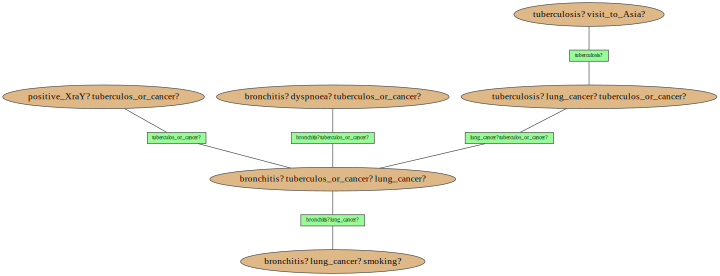

In [ ]:
jt=ie.junctionTree()
gnb.showJunctionTree(bn,size="10")

# Inference as a function

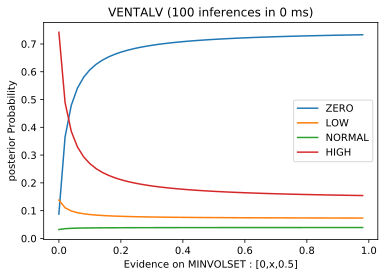

In [ ]:
import time

r=range(0,100,2)
xs=[x/100.0 for x in r]

tf=time.time()
ys=[gum.getPosterior(bn,{'MINVOLSET':[0,x/100.0,0.5]},'VENTALV').tolist()
        for x in r]
delta=time.time()-tf

p=plot(xs,ys)
legend(p,[bn.variableFromName('VENTALV').label(i)
          for i in range(bn.variableFromName('VENTALV').domainSize())],loc=7);
title('VENTALV (100 inferences in %d ms)'%delta);
ylabel('posterior Probability');
xlabel('Evidence on MINVOLSET : [0,x,0.5]');

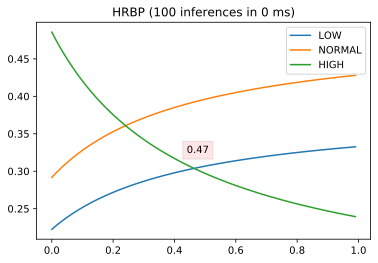

In [ ]:
x=[p/100.0 for p in range(0,100)]

tf=time.time()
y=[gum.getPosterior(bn,{'HRBP':[1.0-p/100.0,1.0-p/100.0,p/100.0]},'TPR').tolist()
   for p in range(0,100)]
delta=time.time()-tf

p=plot(x,y)
title('HRBP (100 inferences in %d ms)'%delta);
v=bn.variableFromName('TPR');
legend([v.label(i) for i in range(v.domainSize())],loc='best');
np1=(transpose(y)[2]>transpose(y)[0]).argmin()
text(x[np1]-0.03,y[np1][0]+0.02,str(x[np1]),bbox=dict(facecolor='red', alpha=0.1));

# Data generation

In [ ]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("data","test.csv"),1000,visible=True)

** The library 'gum.lib.bn2csv' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** The function 'gum.lib.bn2csv.generateCSV' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** Class 'CSVGenerator' is is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
 data/test.csv : [ ########################################################### ] 100%
Log2-Likelihood : -15138.636177524828



-15138.636177524828

In [ ]:
from pyAgrum.lib._utils import oslike
#oslike.head(os.path.join('dossier', 'test.csv'))
oslike.head(os.path.join("data","test.csv"))

MINVOLSET,VENTMACH,DISCONNECT,VENTTUBE,INTUBATION,PULMEMBOLUS,SHUNT,PAP,FIO2,KINKEDTUBE,PRESS,VENTLUNG,VENTALV,PVSAT,SAO2,ARTCO2,EXPCO2,MINVOL,ANAPHYLAXIS,TPR,INSUFFANESTH,CATECHOL,HR,ERRCAUTER,HREKG,HRSAT,ERRLOWOUTPUT,HRBP,LVFAILURE,HISTORY,HYPOVOLEMIA,LVEDVOLUME,PCWP,CVP,STROKEVOLUME,CO,BP
LOW,LOW,FALSE,ZERO,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,HIGH,NORMAL,NORMAL,LOW,LOW,NORMAL,NORMAL,LOW,FALSE,LOW,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,NORMAL,HIGH,LOW
NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,HIGH,LOW,HIGH,HIGH,HIGH,LOW,LOW,HIGH,FALSE,LOW,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,NORMAL,HIGH,NORMAL
NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,NORMAL,ZERO,NORMAL,LOW,LOW,NORMAL,LOW,ZERO,FALSE,HIGH,FALSE,NORMAL,NORMAL,FALSE,LOW,LOW,FALSE,LOW,FALSE,FALSE,FALSE,NORMAL,NORMAL,NORMAL,HIGH,NORMAL,HIGH
NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,H

# BN as a probabistic classifier

 data/test.csv : [ ########################################################### ] 100%
 result in data/test.csv-ROC_alarm.bif-CATECHOL-HIGH.png


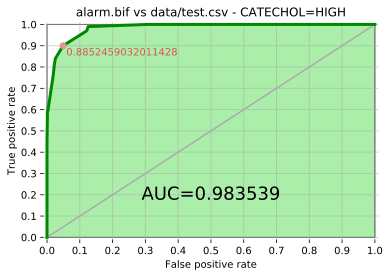

In [ ]:
from pyAgrum.lib.bn2roc import showROC
showROC(bn,os.path.join("data","test.csv"),
        variable='CATECHOL',label='HIGH',  # class and label
        visible=True,show_fig=True,with_labels=True)

 data/test.csv : [ ########################################################### ] 100%
 result in data/test.csv-ROC_alarm.bif-SAO2-HIGH.png


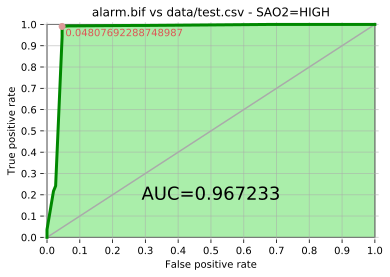

In [ ]:
showROC(bn,os.path.join("data","test.csv"),'SAO2','HIGH',visible=True)

# Fast prototyping of BNs

In [ ]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)
gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

Inference given that c=0,Inference given that c=1,Inference given that c=2


In [ ]:
print(gum.getPosterior(bn1,evs={'c':0},target='c'))
print(gum.getPosterior(bn1,evs={'c':0},target='a'))

<c:0> :: 1 /<c:1> :: 0 /<c:2> :: 0
<a:0> :: 0.523453 /<a:1> :: 0.21176 /<a:2> :: 0.264787



# Joint posterior, impact of evidence

In [ ]:
bn=gum.fastBN("a->b->c->d;b->e->d->f;g->c")
gnb.sideBySide(bn,gnb.getInference(bn))

In [ ]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"e","f","g"})
ie.makeInference()
gnb.sideBySide(ie.jointPosterior({"e","f","g"}),ie.jointPosterior({"e","f"}),
               captions=["Joint posterior $P(e,f,g)$","Joint posterior $P(e,f)$"])

In [ ]:
gnb.sideBySide(ie.evidenceImpact("a",["e","f"]),ie.evidenceImpact("a",["d","e","f"]),
              captions=["$\\forall e,f, P(a|e,f)$",
                        "$\\forall d,e,f, P(a|d,e,f)=P(a|d,e)$ using d-separation"]
                        )

In [ ]:
gnb.sideBySide(ie.evidenceJointImpact(["a","b"],["e","f"]),
               ie.evidenceJointImpact(["a","b"],["d","e","f"]),
              captions=["$\\forall e,f, P(a,b|e,f)$",
                        "$\\forall d,e,f, P(a,b|d,e,f)=P(a,b|d,e)$ using d-separation"]
                        )

# BN structure learning from data


In [ ]:
!pwd
bn = gum.loadBN(os.path.join("templates","asia.bif"))
bn

/Users/aaussem/Documents/Python/TP/TP_PGM_2020


(gum::BayesNet<double>@0x7fb87b144800) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [ ]:
gum.generateCSV(bn,os.path.join("data","sample_asia.csv"),5000,True)
#gum.generateCSV(bn,"sample_asia.csv",5000,with_labels=True)

 data/sample_asia.csv : [ #################################################### ] 100%
Log2-Likelihood : -16055.37955090398


-16055.37955090398

In [ ]:
import pandas
df=pandas.read_csv(os.path.join("data","sample_asia.csv"))
df.head()

,lung_cancer?,positive_XraY?,dyspnoea?,tuberculos_or_cancer?,tuberculosis?,bronchitis?,smoking?,visit_to_Asia?
0,1,1,0,1,1,0,0,1
1,1,1,1,1,1,1,0,1
2,1,1,1,1,1,1,1,1
3,1,1,0,1,1,0,0,1
4,1,1,0,1,1,0,1,1


In [ ]:
#gum.generateCSV(bn,"sample_asia.csv",5000,with_labels=True)
c=pandas.crosstab(df['dyspnoea?'],[df['tuberculos_or_cancer?'],df['bronchitis?']])
c

tuberculos_or_cancer?    0          1      
bronchitis?              0    1     0     1
dyspnoea?                                  
0                      169  104  1663   254
1                       13   50   407  2340

In [ ]:
import pyAgrum.lib._utils.oslike as oslike
print("===\n  Size of the generated database\n===")
oslike.wc_l(os.path.join("data","sample_asia.csv"))
print("\n===\n  First lines\n===")
oslike.head(os.path.join("data","sample_asia.csv"))

===
  Size of the generated database
===
5000

===
  First lines
===
lung_cancer?,positive_XraY?,dyspnoea?,tuberculos_or_cancer?,tuberculosis?,bronchitis?,smoking?,visit_to_Asia?
1,1,0,1,1,0,0,1
1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1
1,1,0,1,1,0,0,1
1,1,0,1,1,0,1,1
1,1,1,1,1,1,0,1
1,1,0,1,1,0,0,1
1,1,0,1,1,0,0,1
1,1,1,1,1,0,0,1



In [ ]:
gum.generateCSV(bn,os.path.join("data","sample_asia.csv"),5000,with_labels=True)
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.names()

('visit_to_Asia?',
 'tuberculosis?',
 'tuberculos_or_cancer?',
 'positive_XraY?',
 'lung_cancer?',
 'smoking?',
 'bronchitis?',
 'dyspnoea?')

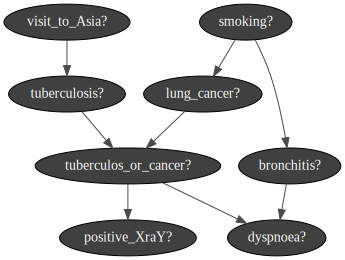

In [ ]:
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()
gnb.showBN(bn2)

In [ ]:
learner.idFromName('lung_cancer?')

4

In [ ]:
learner.nameFromId(4)

'lung_cancer?'

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables and labels
learner.setInitialDAG(bn.dag())
bn2=learner.learnParameters()

In [ ]:
from IPython.display import HTML

HTML('<table><tr><td style="text-align:center;"><h3>original BN</h3></td>'+
     '<td style="text-align:center;"><h3>Learned BN</h3></td></tr>'+
     '<tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('visit_to_Asia?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('visit_to_Asia?')))
     +'</center></td></tr><tr><td><center>'+
     gnb.getPotential(bn.cpt (bn.idFromName('tuberculosis?')))
     +'</center></td><td><center>'+
     gnb.getPotential(bn2.cpt(bn2.idFromName('tuberculosis?')))
     +'</center></td></tr></table>')


# Various score-based learning algorithms


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

Learned in 4.399358ms


** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


{'klPQ': 0.007422894507389233,
 'errorPQ': 0,
 'klQP': 0.006404851334445917,
 'errorQP': 128,
 'hellinger': 0.048927573468476405,
 'bhattacharya': 0.0011976649953752082,
 'jensen-shannon': 0.0016465840748716878}

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
gnb.sideBySide(bn2,gnb.getInformation(bn2))

Learned in 4.280025ms


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([0,1,2,3,4,5,6,7])
bn2=learner.learnBN()
print("Learned in {0}ms".format(1000*learner.currentTime()))
bn2

Learned in 1.845563ms


(gum::BayesNet<double>@0x7fb87c284600) BN{nodes: 8, arcs: 8, domainSize: 256, dim: 36}

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useK2([7,6,5,4,3,2,1,0])
bn2=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
bn2

Learned in 0.001223764s


(gum::BayesNet<double>@0x7fb85b1a5200) BN{nodes: 8, arcs: 11, domainSize: 256, dim: 56}


# Plotting the score during learning

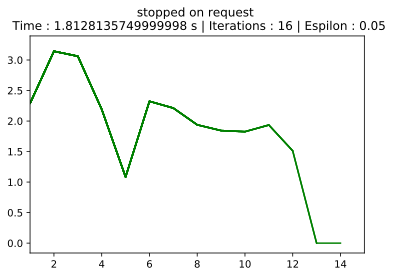

In [ ]:
import numpy as np
%matplotlib inline

learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

# we could prefere a log2likelihood score
# learner.useScoreLog2Likelihood()
learner.setMaxTime(10)

# representation of the error as a pseudo log (negative values really represents negative epsilon
@np.vectorize
def pseudolog(x):
    seuil=2.0
    y=-x if x<0 else x

    if y<seuil:
        res=y*np.log10(seuil)/seuil
    else:
        res=np.log10(y)

    return res if x>0 else -res

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(3) # no more than 3 parent by node
gnb.animApproximationScheme(learner,
                            scale=pseudolog) # scale by default is np.log10

bn2=learner.learnBN()

# Learning a tree


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

learner.setMaxIndegree(1) # no more than 1 parent by node

bntree=learner.learnBN()
bntree

(gum::BayesNet<double>@0x7fb87b1dec00) BN{nodes: 8, arcs: 6, domainSize: 256, dim: 28}

# Learning with prior structural knowledge


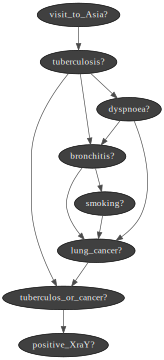

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc("smoking?","lung_cancer?") # smoking->lung_cancer
# I know that visit to Asia may change the risk of tuberculosis
learner.addMandatoryArc("visit_to_Asia?","tuberculosis?") # visit_to_Asia->tuberculosis

bn2=learner.learnBN()
gnb.showBN(bn2,size="5")

# Comparing BNs


In [ ]:
help(gnb.getBNDiff)

Help on function getBNDiff in module pyAgrum.lib.notebook:

getBNDiff(bn1, bn2, size=None)
    get a HTML string representation of a graphical diff between the arcs of _bn1 (reference) with those of _bn2.
    
    * full black line: the arc is common for both
    * full red line: the arc is common but inverted in _bn2
    * dotted black line: the arc is added in _bn2
    * dotted red line: the arc is removed in _bn2
    
    :param BayesNet bn1: referent model for the comparison
    :param BayesNet bn2: bn compared to the referent model
    :param size: size of the rendered graph



In [ ]:
gnb.sideBySide(bn,bn2,gnb.getBNDiff(bn,bn2),
              captions=['target','learned BN','graphical diffs between target and learned'])

target,learned BN,graphical diffs between target and learned


In [ ]:
kl=gum.BruteForceKL(bn,bn2)
kl.compute()

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


{'klPQ': 0.007391596484509329,
 'errorPQ': 0,
 'klQP': 0.007103150079349712,
 'errorQP': 128,
 'hellinger': 0.051253289509635036,
 'bhattacharya': 0.0013143075247823586,
 'jensen-shannon': 0.0018453102596094296}

In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()

# I know that smoking causes cancer
learner.addMandatoryArc(0,1)

# we prefere a log2likelihood score
learner.useScoreLog2Likelihood()

# in order to control the complexity, we limit the number of parents
learner.setMaxIndegree(1) # no more than 1 parent by node

bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useGreedyHillClimbing()
learner.addMandatoryArc(0,1)
bn2=learner.learnBN()
kl=gum.BruteForceKL(bn,bn2)
gnb.sideBySide(bn2,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


In [ ]:
learner=gum.BNLearner(os.path.join("data","sample_asia.csv"),bn) #using bn as template for variables
learner.useLocalSearchWithTabuList()

learner.setInitialDAG(bn2.dag())
#learner.setMaxNbDecreasingChanges(2)

bn3=learner.learnBN()
kl=gum.BruteForceKL(bn,bn3)
gnb.sideBySide(bn3,
               "<br/>".join(["<b>"+k+"</b> :"+str(v) for k,v in kl.compute().items()]),
               captions=["learned BN","distances"])

** pyAgrum.BruteForceKL is deprecated in pyAgrum>0.12.6.
** A pyAgrum.ExactBNdistance has been created.


In [ ]:
from pyAgrum.lib.bn2csv import generateCSV
generateCSV(bn,os.path.join("data","test.csv"),1000,visible=True)

** The function 'gum.lib.bn2csv.generateCSV' is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
** Class 'CSVGenerator' is is deprecated in pyAgrum>0.12.0. Please use gum.generateCSV instead.
 data/test.csv : [ ########################################################### ] 100%
Log2-Likelihood : -3241.927540701935



-3241.927540701935

In [ ]:
from pyAgrum.lib._utils import oslike
oslike.head(os.path.join("data","test.csv"))

smoking?,lung_cancer?,bronchitis?,visit_to_Asia?,tuberculosis?,tuberculos_or_cancer?,dyspnoea?,positive_XraY?
f2,e2,g2,a2,b2,c2,h2,d2
f1,e2,g1,a2,b2,c2,h1,d2
f1,e1,g1,a2,b2,c1,h1,d1
f2,e2,g2,a2,b2,c2,h2,d2
f2,e2,g2,a2,b2,c2,h2,d2
f1,e2,g1,a2,b2,c2,h1,d2
f2,e2,g2,a2,b2,c2,h2,d2
f1,e2,g1,a2,b2,c2,h1,d2
f2,e2,g2,a2,b2,c2,h2,d2



In [ ]:
bn1=gum.fastBN("a->b;a->c;b->c;c->d",3)

gnb.sideBySide(*[gnb.getInference(bn1,evs={'c':val},
                targets={'a','c','d'}) for val in range(3)],
              captions=["<pre>Inference given that c={}</pre>".format(val) for val in range(3)])

Inference given that c=0,Inference given that c=1,Inference given that c=2


---
# TO DO

- ### Implémenter avec PyAGrUM les exercices 6 et 8 du TD1 PGM.
- ### Confirmer les résutats obtenus "à la main".
---

### Exercice 8 du TD :


Consider the Bayesian network Figure 2 with a new variable $L$ being the child of $B$. Suppose that $P(L=1\mid B=1)=0.8$ and $P(L=1 \mid B=0)=0.0$. "$L=1$" denotes "the car headlights are well functioning".

- Compute $P(L=0)$.
- Compute $L$ and $F$ independent?
- Compute $P(F=1\mid G=0,L=1$) and compare to $P(F=1\mid G=0$). Are $F$ and $L$ independent given $G$?
- Write down all the conditional and inconditional independencies encoded in this directed acyclic graph.
- What is the compression rate in terms of memory space?


### Exercice 6 du TD :

La Figure 1 montre une chaîne de Markov cachée comprenant 3 états 1, 2 ,3. Les valuations des arcs sont les probabilités de transition entre les états.  On suppose que le systéme markovien étudié visite ces états succesivement avec les probabilités initiales $\pi = (0.6,0.4,0)$. Dans chaque état, le systéme émet un symbole choisi dans l'alphabet V=\{a,b\} avec les probabilités d'émission affichées.

- Evaluer la probabilité de la suite d'observation $aab$.
- Déterminer la {\em meilleure} suite d'états qui rend la séquence observée, $aab$, la plus probable.

### Exercice 2 du CC2 :

$
    P(y \mid \mathbf{do}(x)) =
\sum_{\mathbf{pa}_x}
    P(y \mid x, \mathbf{pa}_x) P(\mathbf{pa}_x)
$

Appliquer la formule précédente pour en déduire $P(sante \mid \mathbf{do}(bio))$. On supposera que les variables sont binaires et que : 30\% des individus ont des revenus élévés, 60\% mangent bio parmi les revenus élevés, 40\% mangent bio parmi les revenus modestes, 80\% sont en bonne santé sachant bio et revenus élévés, 70\% sont en bonne santé sachant bio et revenus modestes, 60\% sont en bonne santé sachant non bio et revenus élévés, et 50\% sont en bonne santé sachant non bio et revenus modestes.

Vous trouverez ci-dessous des examples d'inférence causale réalisés avec PyAGrUM :

http://www-desir.lip6.fr/~phw/aGrUM/docs/last/notebooks/Tobacco.ipynb.html

#### Exercice 8 du TD

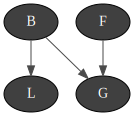

P(L=0): 0.28
L and F independent? True
P(F=1|G=0, L=1): 0.18181818181818182
P(F=1|G=0): 0.14999999999999997
F and L independent given G? False

Unconditional Independencies:
G independant de B ? False
G independant de F ? False
G independant de L ? False
B independant de F ? True
B independant de L ? False
L independant de F ? True

Unconditional Independencies:
G independant de B given F ? False
G independant de B given L ? False
G independant de F given B ? False
G independant de F given L ? False
G independant de L given B ? True
G independant de L given F ? False
B independant de F given G ? False
B independant de F given L ? True
F independant de L given G ? False
F independant de L given B ? True


In [4]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Créer le réseau bayésien
bn = gum.fastBN("B->L;B->G;F->G")

# Définir les probabilités conditionnelles
bn.cpt("L")[:] = [[0.2, 0.8], [1.0, 0.0]]  # P(L=1|B=1)=0.8, P(L=1|B=0)=0.0

# Définir les probabilités conditionnelles pour la variable G
bn.cpt("G")[{'B': 0, 'F': 0}] = [0.1, 0.9]  # P(G=1|B=0, F=0), P(G=0|B=0, F=0)
bn.cpt("G")[{'B': 0, 'F': 1}] = [0.2, 0.8]  # P(G=1|B=0, F=1), P(G=0|B=0, F=1)
bn.cpt("G")[{'B': 1, 'F': 0}] = [0.8, 0.2]  # P(G=1|B=1, F=0), P(G=0|B=1, F=0)
bn.cpt("G")[{'B': 1, 'F': 1}] = [0.9, 0.1]  # P(G=1|B=1, F=1), P(G=0|B=1, F=1)


# Définir les probabilités marginales pour B et F
bn.cpt("B")[:] = [0.9, 0.1]  # P(B=1)
bn.cpt("F")[:] = [0.9, 0.1]  # P(F=1)

# Afficher le réseau bayésien
gnb.showBN(bn)

# Calculer P(L=0)
ie = gum.LazyPropagation(bn)
ie.makeInference()
p_L_0 = ie.posterior("L")[0]
print("P(L=0):", p_L_0)

# Vérifier l'indépendance de L et F
independent_L_F = bn.isIndependent("L", "F")
print("L and F independent?", independent_L_F)

# Calculer P(F=1|G=0, L=1) et P(F=1|G=0)
ie = gum.LazyPropagation(bn)
ie.setEvidence({"G": 0, "L": 1})
ie.makeInference()
p_F_1_given_G_0_L_1 = ie.posterior("F")[1]
ie.setEvidence({"G": 0})
ie.makeInference()
p_F_1_given_G_0 = ie.posterior("F")[1]

print("P(F=1|G=0, L=1):", p_F_1_given_G_0_L_1)
print("P(F=1|G=0):", p_F_1_given_G_0)

# Vérifier l'indépendance conditionnelle de F et L donné G
independent_F_L_given_G = bn.isIndependent("F", "L", {"G"})
print("F and L independent given G?", independent_F_L_given_G)

# Afficher les indépendances inconditionnelles
print("\nUnconditional Independencies:")
print("G independant de B ?", bn.isIndependent("G", "B"))
print("G independant de F ?", bn.isIndependent("G", "F"))
print("G independant de L ?", bn.isIndependent("G", "L"))

print("B independant de F ?", bn.isIndependent("B", "F"))
print("B independant de L ?", bn.isIndependent("B", "L"))

print("L independant de F ?", bn.isIndependent("L", "F"))

# Afficher les indépendances conditionnelles
print("\nUnconditional Independencies:")
print("G independant de B given F ?", bn.isIndependent("G", "B", {"F"}))
print("G independant de B given L ?", bn.isIndependent("G", "B", {"L"}))

print("G independant de F given B ?", bn.isIndependent("G", "F", {"B"}))
print("G independant de F given L ?", bn.isIndependent("G", "F", {"L"}))

print("G independant de L given B ?", bn.isIndependent("G", "L", {"B"}))
print("G independant de L given F ?", bn.isIndependent("G", "L", {"F"}))

print("B independant de F given G ?", bn.isIndependent("B", "F", {"G"}))
print("B independant de F given L ?", bn.isIndependent("B", "F", {"L"}))

print("F independant de L given G ?", bn.isIndependent("F", "L", {"G"}))
print("F independant de L given B ?", bn.isIndependent("F", "L", {"B"}))


#### Exercice 6 du TD

In [21]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Créer le modèle de MarkovNet
markov_net = gum.MarkovNet("HiddenMarkovModel")

# Ajouter les variables (états)
s1 = markov_net.add(gum.LabelizedVariable("S1", "State 1", 3))
s2 = markov_net.add(gum.LabelizedVariable("S2", "State 2", 3))
s3 = markov_net.add(gum.LabelizedVariable("S3", "State 3", 3))

# Ajouter les variables auxiliaires pour représenter les transitions
transition_s1_s1 = markov_net.add(gum.LabelizedVariable("Trans_S1_S1", "Transition S1 to S1", 3))
transition_s1_s2 = markov_net.add(gum.LabelizedVariable("Trans_S1_S2", "Transition S1 to S2", 3))
transition_s1_s3 = markov_net.add(gum.LabelizedVariable("Trans_S1_S3", "Transition S1 to S3", 3))
transition_s2_s1 = markov_net.add(gum.LabelizedVariable("Trans_S2_S1", "Transition S2 to S1", 3))
transition_s2_s2 = markov_net.add(gum.LabelizedVariable("Trans_S2_S2", "Transition S2 to S2", 3))
transition_s2_s3 = markov_net.add(gum.LabelizedVariable("Trans_S2_S3", "Transition S2 to S3", 3))
transition_s3_s1 = markov_net.add(gum.LabelizedVariable("Trans_S3_S1", "Transition S3 to S1", 3))
transition_s3_s2 = markov_net.add(gum.LabelizedVariable("Trans_S3_S2", "Transition S3 to S2", 3))
transition_s3_s3 = markov_net.add(gum.LabelizedVariable("Trans_S3_S3", "Transition S3 to S3", 3))

# Ajouter les probabilités de transition
markov_net.addFactor(["Trans_S1_S1", "S1"], [0.3, 0.0, 0.0])
markov_net.addFactor(["Trans_S1_S2", "S1"], [0.5, 0.0, 0.0])
markov_net.addFactor(["Trans_S1_S3", "S1"], [0.2, 0.0, 0.0])
markov_net.addFactor(["Trans_S2_S1", "S2"], [0.0, 0.0, 0.0])
markov_net.addFactor(["Trans_S2_S2", "S2"], [0.0, 0.3, 0.0])
markov_net.addFactor(["Trans_S2_S3", "S2"], [0.0, 0.7, 0.0])
markov_net.addFactor(["Trans_S3_S1", "S3"], [0.0, 0.0, 0.0])
markov_net.addFactor(["Trans_S3_S2", "S3"], [0.0, 0.0, 0.0])
markov_net.addFactor(["Trans_S3_S3", "S3"], [0.0, 0.0, 1.0])

# Ajouter les probabilités initiales
markov_net.addFactor(["S1"], [0.6, 0.4, 0.0])

# Ajouter les probabilités d'émission
markov_net.addFactor(["S1"], [1.0, 0.0])
markov_net.addFactor(["S2"], [0.5, 0.5])
markov_net.addFactor(["S3"], [0.0, 1.0])

# Afficher le MarkovNet
gnb.showMarkovNet(markov_net)

# Évaluer la probabilité de la séquence d'observations "aab"
sequence = ["a", "a", "b"]
likelihood = markov_net.jointProbability(sequence)

print(f"La probabilité de la séquence {sequence} est : {likelihood:.5f}")

# Trouver la séquence d'états la plus probable pour la séquence "aab"
viterbi_path = gum.MostProbableExplanation(markov_net, ["S1", "S2", "S3"], {"S1": "a", "S2": "a", "S3": "b"})
viterbi_states = [markov_net.variable(viterbi_path[i]).name() for i in range(len(viterbi_path))]

print(f"La séquence d'états la plus probable est : {viterbi_states}")


<ipython-input-21-c7e8538d8df2>:5: DeprecationWarning: "
** pyAgrum.MarkovNet is deprecated in pyAgrum>1.5.2.
** A pyAgrum.MarkovRandomField has been created.

  markov_net = gum.MarkovNet("HiddenMarkovModel")


TypeError: MarkovRandomField_addFactor expected at most 2 arguments, got 3
Additional information:
Wrong number or type of arguments for overloaded function 'MarkovRandomField_addFactor'.
  Possible C/C++ prototypes are:
    gum::MarkovRandomField< double >::addFactor(std::vector< std::string,std::allocator< std::string > > const &)
    gum::MarkovRandomField< double >::addFactor(gum::NodeSet const &)
    gum::MarkovRandomField< double >::addFactor(gum::Potential< double > const &)
    gum::MarkovRandomField< double >::addFactor(PyObject *)


In [44]:
import pyAgrum as gum

# Créer le modèle de BayesNet
bayes_net = gum.BayesNet("HiddenMarkovModel")

# Ajouter les variables (états)
s1 = bayes_net.add(gum.LabelizedVariable("S1", "State 1", 3))
s2 = bayes_net.add(gum.LabelizedVariable("S2", "State 2", 3))
s3 = bayes_net.add(gum.LabelizedVariable("S3", "State 3", 3))

# Ajouter les variables d'observation
a = bayes_net.add(gum.LabelizedVariable("a", "Symbol a", 3))
b = bayes_net.add(gum.LabelizedVariable("b", "Symbol b", 3))

# Ajouter les probabilités d'émission pour les symboles d'observation
bayes_net.cpt(a).fillWith([1.0, 0.0, 0.0])
bayes_net.cpt(b).fillWith([0.0, 0.0, 1.0])

# Ajouter les probabilités de transition
bayes_net.cpt(s1).fillWith([0.3, 0.5, 0.2])
bayes_net.cpt(s2)[{'S1': 0}] = [0.0, 0.0, 0.0]
bayes_net.cpt(s2)[{'S1': 1}] = [0.0, 0.3, 0.7]
bayes_net.cpt(s2)[{'S1': 2}] = [0.0, 0.0, 0.0]

# Ajouter les probabilités d'émission
bayes_net.cpt(s1).fillWith([0.3, 0.5, 0.2])
bayes_net.cpt(s2).fillWith([0, 0.3, 0.7])
bayes_net.cpt(s3).fillWith([0.0, 0.0, 1.0])

# Ajouter les probabilités initiales
bayes_net.cpt(s1).fillWith([0.6, 0.4, 0.0])

# Évaluer la probabilité de la séquence d'observations "aab"
sequence = ["a", "a", "b"]

# Créer une Instantiation à partir de la séquence d'observations
instantiation = gum.Instantiation()

# Ajouter les variables et leurs valeurs à l'instantiation
for i, symbol in enumerate(sequence):
    variable_id = bayes_net.idFromName(f"S{i + 1}")
    value = bayes_net.idFromName(symbol)
    instantiation[variable_id] = value

# Évaluer la probabilité à l'aide de la méthode jointProbability
likelihood = bayes_net.jointProbability(instantiation)

print(f"La probabilité de la séquence {sequence} est : {likelihood:.5f}")


# Trouver la séquence d'états la plus probable pour la séquence "aab"
viterbi_path = gum.MostProbableExplanation(bayes_net, ["S1", "S2", "S3"], {"S1": "a", "S2": "a", "S3": "b"})
viterbi_states = [bayes_net.variable(viterbi_path[i]).name() for i in range(len(viterbi_path))]

print(f"La séquence d'états la plus probable est : {viterbi_states}")


NotFound: [pyAgrum] Object not found: 

In [ ]:
import pyAgrum as gum

# Créer le modèle de BayesNet
bayes_net = gum.BayesNet("HiddenMarkovModel")

# Ajouter les variables (états)
s1 = bayes_net.add(gum.LabelizedVariable("S1", "State 1", 3))
s2 = bayes_net.add(gum.LabelizedVariable("S2", "State 2", 3))
s3 = bayes_net.add(gum.LabelizedVariable("S3", "State 3", 3))

# Ajouter les probabilités de transition
bayes_net.cpt(s1).fillWith([0.3, 0.5, 0.2])
bayes_net.cpt(s2)[{'S1': 0}] = [0.0, 0.0, 0.0]
bayes_net.cpt(s2)[{'S1': 1}] = [0.0, 0.3, 0.7]
bayes_net.cpt(s2)[{'S1': 2}] = [0.0, 0.0, 0.0]

# Ajouter les probabilités d'émission
bayes_net.cpt(s1).fillWith([0.3, 0.5, 0.2])
bayes_net.cpt(s2).fillWith([0, 0.3, 0.7])
bayes_net.cpt(s3).fillWith([0.0, 0.0, 1.0])

# Ajouter les probabilités initiales
bayes_net.cpt(s1).fillWith([0.6, 0.4, 0.0])

# Évaluer la probabilité de la séquence d'observations "aab"
sequence = ["a", "a", "b"]

# Créer une Instantiation vide
instantiation = gum.Instantiation()

for i, symbol in enumerate(sequence):
    variable_id = bayes_net.idFromName(f"S{i + 1}")
    value = bayes_net.idFromName(symbol)
    print(f"Variable: {variable_id}, Symbol: {value}")
    instantiation[variable_id] = value


# Évaluer la probabilité à l'aide de la méthode jointProbability
likelihood = bayes_net.jointProbability(instantiation)

print(f"La probabilité de la séquence {sequence} est : {likelihood:.5f}")


In [55]:
import pyAgrum as gum

# Créer le modèle de BayesNet
bayes_net = gum.BayesNet("HiddenMarkovModel")

# Ajouter les variables (états)
s1 = bayes_net.add(gum.LabelizedVariable("S1", "State 1", 3))
s2 = bayes_net.add(gum.LabelizedVariable("S2", "State 2", 3))
s3 = bayes_net.add(gum.LabelizedVariable("S3", "State 3", 3))

# Ajouter les probabilités de transition
bayes_net.cpt(s1).fillWith([0.3, 0.5, 0.2])
bayes_net.cpt(s2)[{'S1': 0}] = [0.0, 0.0, 0.0]
bayes_net.cpt(s2)[{'S1': 1}] = [0.0, 0.3, 0.7]
bayes_net.cpt(s2)[{'S1': 2}] = [0.0, 0.0, 0.0]

# Ajouter les probabilités d'émission
bayes_net.cpt(s1).fillWith([0.3, 0.5, 0.2])
bayes_net.cpt(s2).fillWith([0, 0.3, 0.7])
bayes_net.cpt(s3).fillWith([0.0, 0.0, 1.0])

# Ajouter les probabilités initiales
bayes_net.cpt(s1).fillWith([0.6, 0.4, 0.0])

# Afficher les identifiants des variables et symboles
for i, symbol in enumerate(sequence):
    variable_id = bayes_net.idFromName(f"S{i + 1}")
    value = bayes_net.idFromName(symbol)
    print(f"Variable: {variable_id}, Symbol: {value}")

    # Ajouter les variables et leurs valeurs à l'instantiation
    instantiation[variable_id] = value

# Évaluer la probabilité à l'aide de la méthode jointProbability
likelihood = bayes_net.jointProbability(instantiation)
print(f"La probabilité de la séquence {sequence} est : {likelihood:.5f}")


NotFound: [pyAgrum] Object not found: No element with the key <a>

In [62]:
import numpy as np

class HiddenMarkovModel:
    def __init__(self, states, initial_prob, transition_prob, emission_prob):
        self.states = states
        self.initial_prob = initial_prob
        self.transition_prob = transition_prob
        self.emission_prob = emission_prob

    def forward_algorithm(self, observations):
        num_states = len(self.states)
        num_observations = len(observations)

        # Initialize forward probabilities
        forward_prob = np.zeros((num_states, num_observations))

        # Initialize base case
        for i in range(num_states):
            forward_prob[i, 0] = self.initial_prob[i] * self.emission_prob[i][observations[0]]

        # Forward algorithm
        for t in range(1, num_observations):
            for j in range(num_states):
                forward_prob[j, t] = sum(forward_prob[i, t - 1] * self.transition_prob[i][j] * self.emission_prob[j][observations[t]] for i in range(num_states))

        # Probability of the sequence
        prob_sequence = sum(forward_prob[i, num_observations - 1] for i in range(num_states))

        return prob_sequence

# Exemple d'utilisation avec des symboles différents
states = ["S1", "S2", "S3"]
symbols = ["a", "b"]
initial_prob = [0.6, 0.4, 0.0]
transition_prob = np.array([[0.3, 0.5, 0.2], [0.0, 0.3, 0.7], [0.0, 0.0, 1.0]])
emission_prob = np.array([[1.0, 0.5, 0.0], [0, 0.5, 1.0], [0,0,0]])

hmm = HiddenMarkovModel(states, initial_prob, transition_prob, emission_prob)

# Calcul de la probabilité de la séquence d'observations "aab"
sequence = ["a", "a", "b"]
observations = [symbols.index(symbol) for symbol in sequence]
likelihood = hmm.forward_algorithm(observations)

print(f"La probabilité de la séquence {sequence} est : {likelihood:.5f}")


La probabilité de la séquence ['a', 'a', 'b'] est : 0.07200


<ipython-input-62-25d214cb4a4d>:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  forward_prob[j, t] = sum(forward_prob[i, t - 1] * self.transition_prob[i][j] * self.emission_prob[j][observations[t]] for i in range(num_states))
<ipython-input-62-25d214cb4a4d>:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  prob_sequence = sum(forward_prob[i, num_observations - 1] for i in range(num_states))
